In [1]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 감성사전 - Afinn

In [105]:
pos_review=(glob.glob("..\\data\\aclimdb\\train\\pos\\*.txt"))[20]

In [106]:
f = open(pos_review, 'r')
lines1 = f.readlines()[0]
f.close()

In [107]:
afinn = Afinn()

In [108]:
afinn.score(lines1) # -15 ~ 20

8.0

In [109]:
neg_review=(glob.glob("..\\data\\aclimdb\\train\\neg\\*.txt"))[20]

In [110]:
f = open(neg_review, 'r')
lines2 = f.readlines()[0]
f.close()

In [111]:
afinn.score(lines2)

-4.0

In [ ]:
# 감성사전 - NRC

In [112]:
NRC=pd.read_csv('..\\data\\nrc.txt',engine="python",header=None,sep="\t")
NRC.head()

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [113]:
NRC.iloc[:,1].value_counts()

fear            14182
negative        14182
joy             14182
trust           14182
positive        14182
sadness         14182
surprise        14182
anticipation    14182
disgust         14182
anger           14182
Name: 1, dtype: int64

In [114]:
NRC = NRC[(NRC != 0).all(1)]

In [119]:
NRC[NRC[0] == 'happy']

,0,1,2
57871,happy,anticipation,1
57874,happy,joy,1
57876,happy,positive,1
57879,happy,trust,1


In [120]:
NRC[NRC[0] == 'disaster']

,0,1,2
36260,disaster,anger,1
36262,disaster,disgust,1
36263,disaster,fear,1
36265,disaster,negative,1
36267,disaster,sadness,1
36268,disaster,surprise,1


In [121]:
NRC=NRC.reset_index(drop=True)

In [122]:
tokenizer = RegexpTokenizer('[\w]+')

In [123]:
stop_words = stopwords.words('english')


In [124]:
p_stemmer = PorterStemmer()


In [125]:
raw = lines1.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

In [126]:
match_words = [x for x in stopped_tokens if x in list(NRC[0])]


In [150]:
match_words

['crisis',
 'doubt',
 'friend',
 'friend',
 'ghost',
 'complaint',
 'deliberate',
 'possibility',
 'real',
 'forget',
 'good',
 'terrific',
 'avatar',
 'shot',
 'content',
 'top',
 'coming']

In [151]:
# emotion=[]
# for i in match_words:
#     temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
#     for j in temp:
#         emotion.append(j)

In [159]:
emotion = []
for i in match_words:
    temp = NRC[NRC[0] == i][1].values
    for j in list(temp):
        emotion.append(j)
emotion

['negative',
 'fear',
 'negative',
 'sadness',
 'trust',
 'joy',
 'positive',
 'trust',
 'joy',
 'positive',
 'trust',
 'fear',
 'anger',
 'negative',
 'positive',
 'anticipation',
 'positive',
 'trust',
 'negative',
 'anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'sadness',
 'positive',
 'anger',
 'fear',
 'negative',
 'sadness',
 'surprise',
 'joy',
 'positive',
 'trust',
 'anticipation',
 'positive',
 'trust',
 'anticipation']

In [162]:
sentiment_result1=pd.Series(emotion).value_counts()

In [164]:
sentiment_result1

positive        8
trust           7
negative        5
anticipation    4
joy             4
sadness         3
fear            3
surprise        2
anger           2
dtype: int64

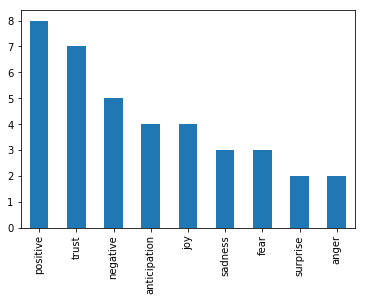

In [165]:
sentiment_result1.plot.bar()


In [230]:
def emotionf(*s1):

# 감정점수를 계산하는 함수 작성



In [231]:
emotionf(('positive', 'anticipation','trust','joy','surprise'))

5

In [232]:
raw = lines2.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

In [233]:
match_words = [x for x in stopped_tokens if x in list(NRC[0])]


In [234]:
# emotion=[]
# for i in match_words:
#     temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
#     for j in temp:
#         emotion.append(j)

In [235]:
emotion1 = []
for i in match_words:
    temp = NRC[NRC[0] == i][1].values
    for j in list(temp):
        emotion1.append(j)
emotion1

['positive',
 'anger',
 'disgust',
 'fear',
 'negative',
 'sadness',
 'disgust',
 'negative']

In [236]:
sentiment_result2=pd.Series(emotion1).value_counts()
sentiment_result2

negative    2
disgust     2
sadness     1
positive    1
fear        1
anger       1
dtype: int64

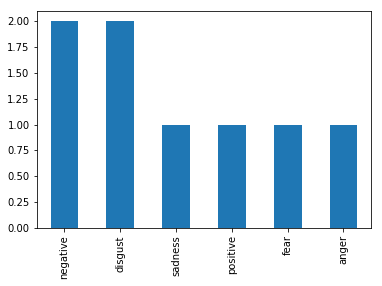

In [237]:
sentiment_result2.plot.bar()


In [238]:
emotionf(emotion1)

-6

In [ ]:
# machine learning

In [378]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [379]:
pos_review=(glob.glob("..\\data\\aclimdb\\train\\pos\\*.txt"))[:20]

In [380]:
# f = open(pos_review, 'r')
# pos_review = f.readlines()[0]
# f.close()

In [381]:
lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

In [382]:
len(lines_pos)

20

In [279]:
# f = open(pos_review, 'r')
# pos_lines = f.readlines()[0]
# f.close()

In [383]:
neg_review=(glob.glob("..\\data\\aclimdb\\train\\neg\\*.txt"))[:20]

In [384]:
# f = open(neg_review, 'r')
# neg_review = f.readlines()[0]
# f.close()

In [386]:

lines_neg=[]
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue

In [388]:
len(lines_neg)

20

In [389]:
total_text = lines_neg + lines_pos

In [390]:
total_text

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son.

In [391]:
len(total_text)

40

In [396]:
total_text[25]

"This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.<br /><br />All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.<br /><br />It rates a 7.7/10 from...<br />

In [308]:
# x = np.array(["pos", "neg"])
# class_Index = np.repeat(x, [len(lines_pos), len(lines_neg)], axis=0)

In [397]:
neg_index = np.repeat('neg', 20)
neg_index = list(neg_index)

In [398]:
 pos_index = np.repeat('pos', 20)
pos_index = list(pos_index)

In [399]:
class_index = neg_index+pos_index

In [402]:
print(class_index)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']


In [403]:
stop_words = stopwords.words('english')

In [404]:
vect = TfidfVectorizer(stop_words=stop_words).fit(total_text)

In [405]:
# df(document frequency) - 전체 문서에서 특정 단어를 포함하는 문서의 빈도
# tf(term frequency) - 특정 단어가 하나의 문서에서 나타난 빈도
# tfidf - tf/df

In [413]:
X_train_vectorized = vect.transform(total_text)

# X_train_vectorized.index = class_Index

In [427]:
# Logistic 예측모델 작성

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [440]:
pos_review_test=(glob.glob("..\\data\\aclimdb\\train\\pos\\*.txt"))[51]

In [443]:
# DecisionTree 감성분석 모델 예측

array(['neg'], dtype='<U3')